<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Aula_B_23_RepasoBatch_10_OC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------
Historial de costos:
18.341425811349442
11.561130628972585
7.292663324536899
4.605488127809669
2.9137971686909463
1.8488019754694562
1.178336088476028
0.7562418303954098
0.49050734235398863
0.32320762945803766
0.21787668175112299
0.15155774136567757
0.1097986416299003
0.08350118161146824
0.06693768688060961
0.056502358640127065
0.04992520023627055
0.045777153823417224
0.0431585649588115
0.041503059141322386
-----------------------------


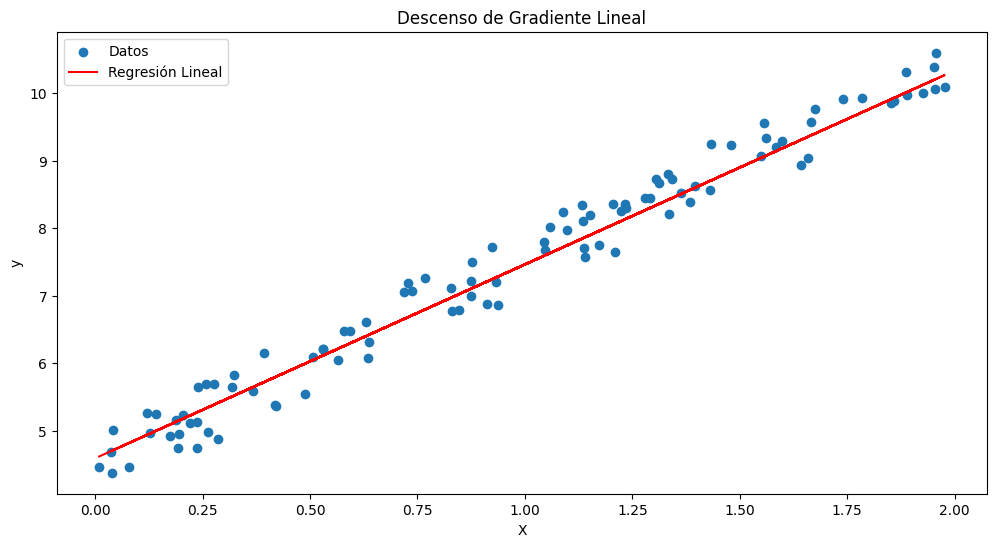

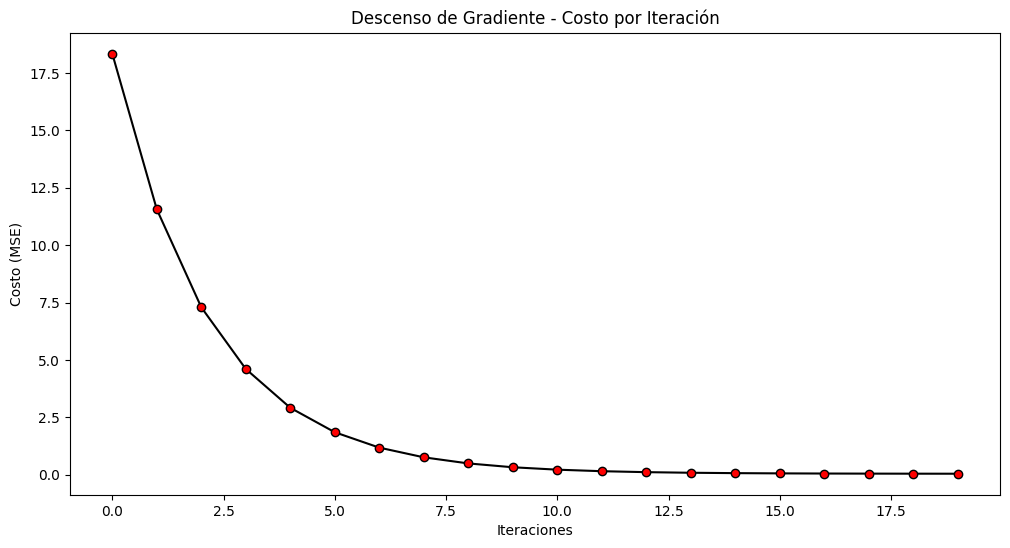

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar datos sintéticos
def generar_datos_sinteticos():
    np.random.seed(0)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.rand(100, 1)
    return X, y

# Función para calcular el costo (MSE)
def calcular_costo(theta, X, y):
    m = len(y)
    predicciones = X.dot(theta)
    costo = np.sum((predicciones - y) ** 2) / (2 * m)
    return costo

# Función para realizar el descenso de gradiente
def descenso_gradiente(X, y, theta, tasa_aprendizaje, iteraciones):
    m = len(y)
    costo_historial = []

    for _ in range(iteraciones):
        gradiente = X.T.dot(X.dot(theta) - y) / m
        theta -= tasa_aprendizaje * gradiente
        costo = calcular_costo(theta, X, y)
        costo_historial.append(costo)

    return theta, costo_historial

# Generar datos sintéticos
X, y = generar_datos_sinteticos()

# Agregar una columna de unos a X para el término de sesgo (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Inicializar theta (parámetros)
theta_inicial = np.random.randn(2, 1)

# Definir hiperparámetros
tasa_aprendizaje = 0.1
iteraciones = 20

# Realizar el descenso de gradiente
theta_final, costo_historial = descenso_gradiente(X_b, y, theta_inicial, tasa_aprendizaje, iteraciones)
print("-----------------------------")
print("Historial de costos:")
for historia in costo_historial:
  print(historia)
print("-----------------------------")
# Graficar los datos y la línea de regresión
plt.figure(figsize=(12,6))
plt.scatter(X, y, label='Datos')
plt.plot(X, X_b.dot(theta_final), color='red', label='Regresión Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Descenso de Gradiente Lineal')

# Graficar la función de costo en función de las iteraciones
plt.figure(figsize=(12,6))
plt.plot(range(iteraciones), costo_historial,color='black',marker='o',markerfacecolor='red')
plt.xlabel('Iteraciones')
plt.ylabel('Costo (MSE)')
plt.title('Descenso de Gradiente - Costo por Iteración')

plt.show()
